In [2]:
pip install diagrams

     |████████████████████████████████| 23.8 MB 1.3 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


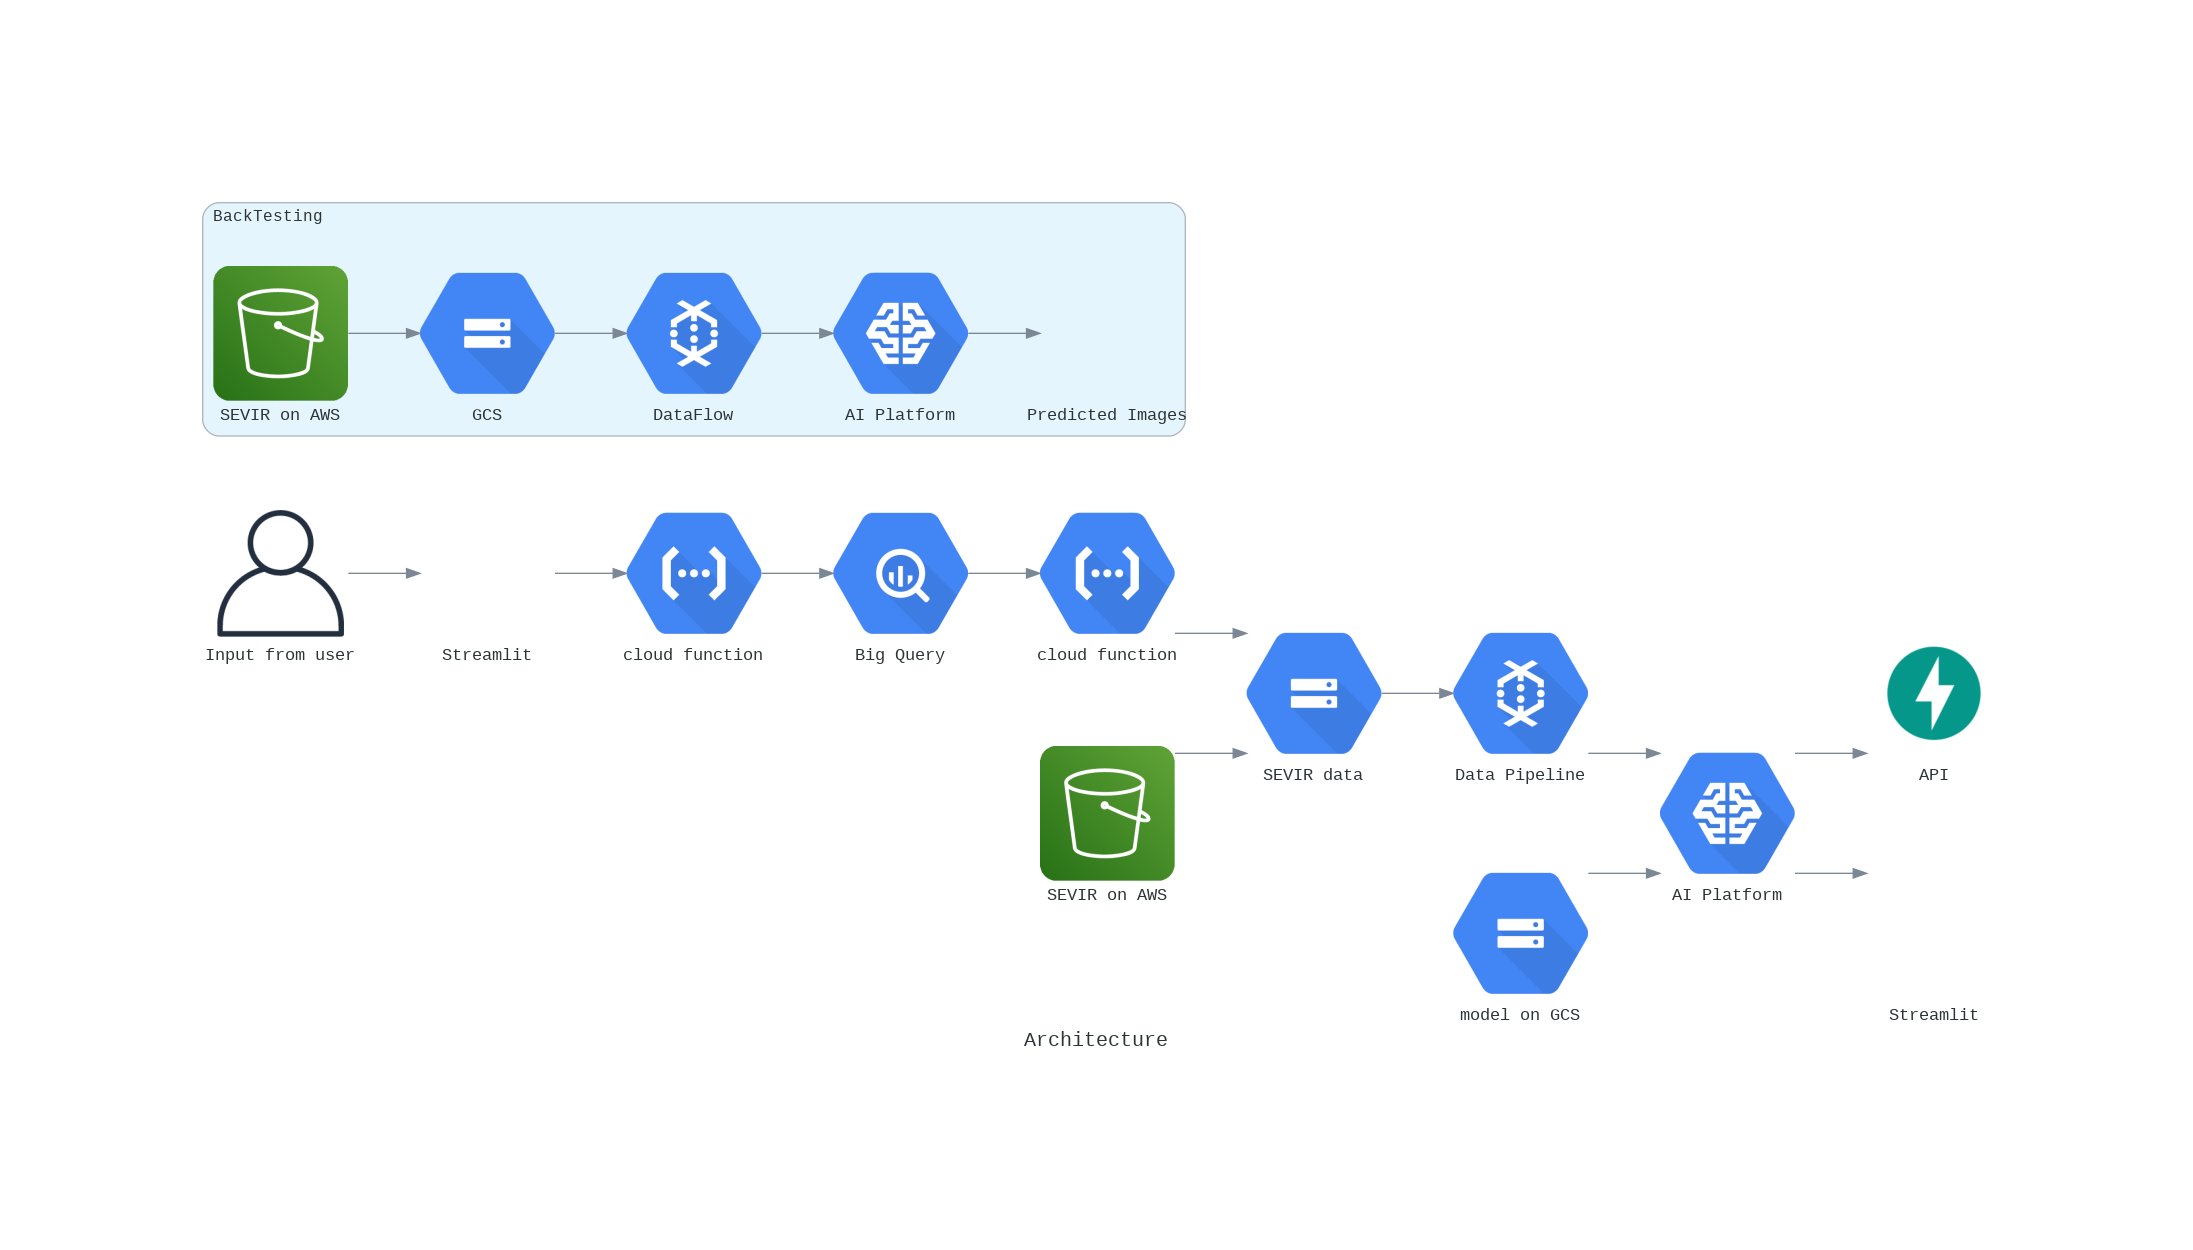

In [16]:
from diagrams import Cluster, Diagram, Edge
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS
from  diagrams.gcp.ml import AIPlatform
from diagrams.generic.blank import Blank
from diagrams.gcp.api import APIGateway
from diagrams.gcp.ml import Automl
from diagrams.programming.framework import Fastapi
from diagrams.generic.device import Mobile
from diagrams.aws.storage import SimpleStorageServiceS3
from diagrams.gcp.compute import GCF
from diagrams.onprem.client import User

with Diagram("Architecture", show=False) as diag:
  ai = AIPlatform("AI Platform")
  #aws = SimpleStorageServiceS3("SEVIR on AWS")
  st = Blank("Streamlit")
  usr = User("Input from user")
  svr = GCS("SEVIR data")

  usr >> st >> GCF("cloud function") >> BigQuery("Big Query") >> GCF("cloud function") >> svr >> Dataflow("Data Pipeline") >> ai
  SimpleStorageServiceS3("SEVIR on AWS") >> svr
  GCS("model on GCS") >> ai
  ai >> Fastapi("API")
  ai >> Blank("Streamlit")

  with Cluster("BackTesting"):
    SimpleStorageServiceS3("SEVIR on AWS") >> GCS("GCS") >> Dataflow("DataFlow") >> AIPlatform("AI Platform") >> Blank("Predicted Images")    
  
diag

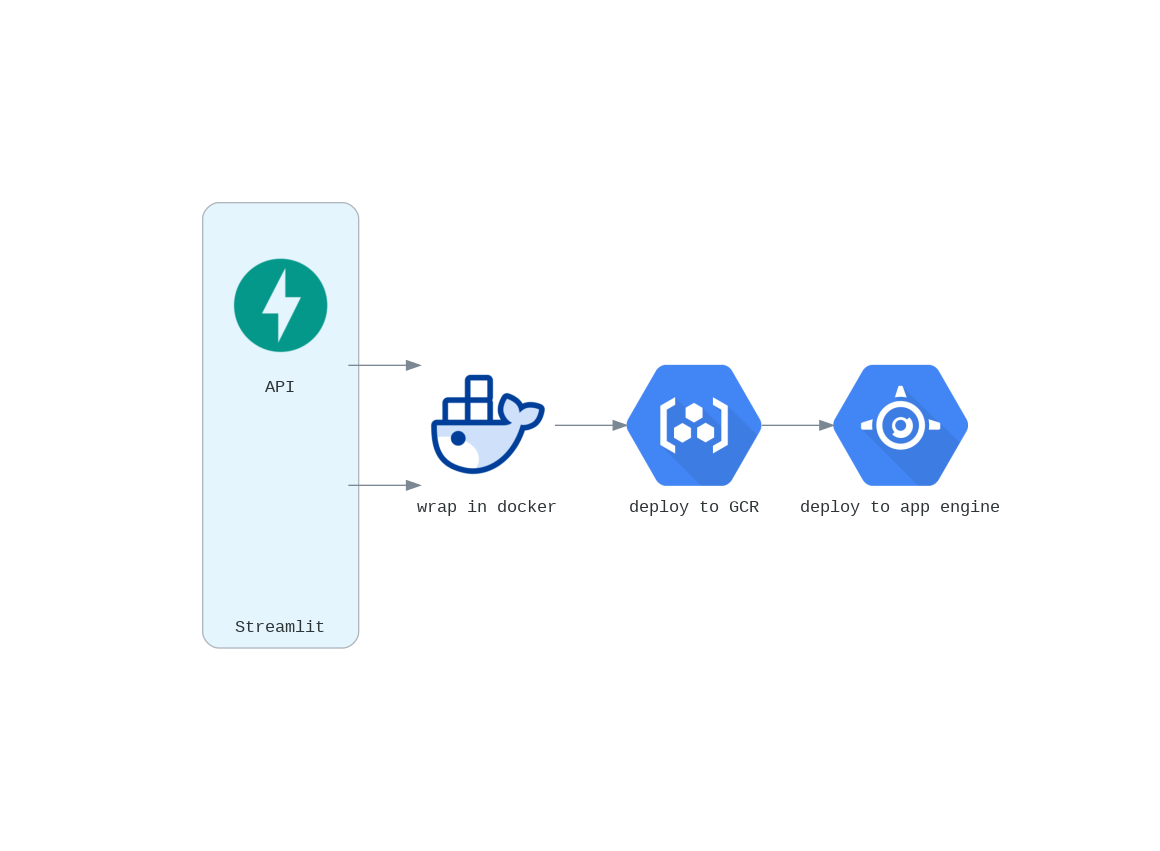

In [17]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS
from  diagrams.gcp.ml import AIPlatform
from diagrams.generic.blank import Blank
from diagrams.gcp.api import APIGateway
from diagrams.gcp.ml import Automl
from diagrams.programming.framework import Fastapi
from diagrams.generic.device import Mobile
from diagrams.aws.storage import SimpleStorageServiceS3
from diagrams.gcp.compute import GCF
from diagrams.digitalocean.compute import Docker
from diagrams.gcp.devtools import GCR

with Diagram("", show=False) as d:
  with Cluster(""):
    grp = [Fastapi("API"), Blank("Streamlit")]

  grp >> Docker("wrap in docker") >> GCR("deploy to GCR") >> AppEngine("deploy to app engine")
d 


